<a href="https://colab.research.google.com/github/Souvik2215151029/Lab-Assignment_id-29/blob/main/Customer_Food_Preference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('/content/canteen_food_data.csv')
df.head()


,Person_ID,Gender,Food_Preference
0,1,Male,Rice
1,2,Female,Noodles
2,3,Female,Noodles
3,4,Female,Noodles
4,5,Male,Burger


In [14]:
contingency_table = pd.crosstab(df['Gender'], df['Food_Preference'])
print("Contingency Table:\n")
print(contingency_table)


Contingency Table:

Food_Preference  Burger  Noodles  Rice
Gender                                
Female               44       50    62
Male                 51       40    53


In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-square Statistic: 1.8542151551304873
Degrees of Freedom: 2
P-value: 0.39569657840698946


In [16]:
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:\n")
print(expected_df)


Expected Frequencies:

Food_Preference  Burger  Noodles  Rice
Gender                                
Female             49.4     46.8  59.8
Male               45.6     43.2  55.2


In [17]:
# Calculate critical value at 0.05 significance level
alpha = 0.05
# Use scipy.stats.chi2.ppf to get the critical value
from scipy.stats import chi2 as chi2_dist # Import the chi2 distribution object with an alias
critical_value = chi2_dist.ppf(1 - alpha, dof)
print("Critical Value at 0.05 significance:", critical_value)

Critical Value at 0.05 significance: 5.991464547107979


In [18]:
# Compare Chi-square statistic with the critical value
if chi2 > critical_value:
    print("Result: Reject the null hypothesis - Gender and Food Preference are associated.")
else:
    print("Result: Fail to reject the null hypothesis - No significant association between Gender and Food Preference.")


Result: Fail to reject the null hypothesis - No significant association between Gender and Food Preference.


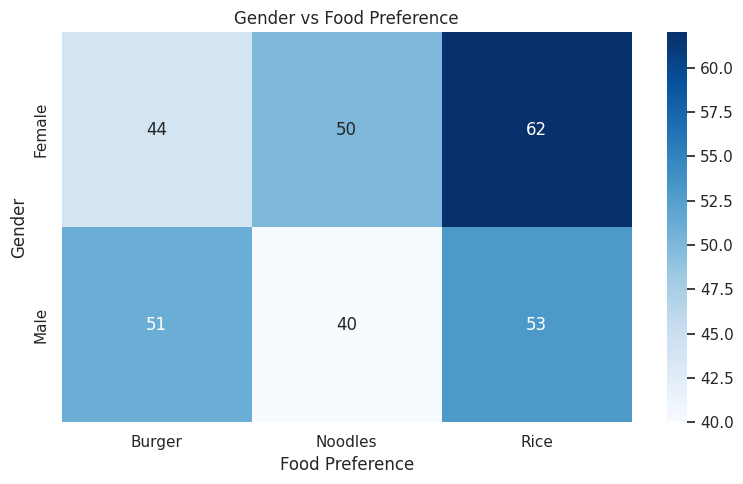

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Gender vs Food Preference')
plt.xlabel('Food Preference')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


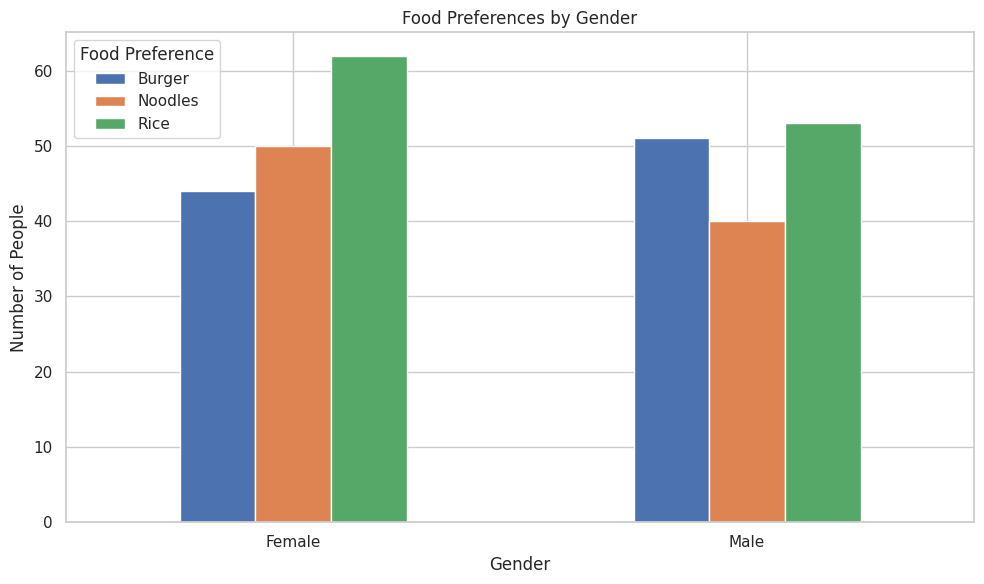

In [20]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count of food preferences by gender
food_gender_counts = df.groupby(['Gender', 'Food_Preference']).size().unstack()

# Plotting the bar plot
food_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Food Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Food Preference')
plt.tight_layout()

plt.show()
